Welcome!

In [1]:
%pip install -r requirements.txt
#pip installs a list of libraries
#list can be found in requirements.txt

#important import names
#import pandas as pd
#import matplotlib.pyplot as plt
#import numpy as np
#import seaborn as sns

In [42]:
#import statements til I figure out the other way 
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.classify import ClassifierI
nltk.download('punkt_tab')
nltk.download('tagsets')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

import random

import pandas as pd

from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn import metrics

import json

import csv

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tabulate import tabulate

import requests

import re


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\avery\AppData\Roaming\nltk_data...
[nltk_data]   Package average

In [ ]:
#import sys
#sys.path.append('.')
#from importables import *
#grabs all imports from import.py

#This is not working but it should be >>>:(


In [3]:
df_elife_train = pd.read_parquet('data/Elife/train-00000-of-00001.parquet')
df_elife_test = pd.read_parquet('data/Elife/test-00000-of-00001.parquet')
df_elife_validation = pd.read_parquet('data/Elife/validation-00000-of-00001.parquet')
df_elife_validation.head(5)

,article,summary,section_headings,keywords,year,title
0,Cell-fate reprograming is at the heart of deve...,The DNA in genes encodes the basic information...,"[Abstract, Introduction, Results, Discussion, ...","[developmental, biology]",2016,Increasing Notch signaling antagonizes PRC2-me...
1,"Klebsiella pneumoniae is a respiratory , blood...",Klebsiella pneumoniae is a type of bacteria th...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology, and, infectious, disease, immun...",2020,SKAP2 is required for defense against K. pneum...
2,Plasmodium vivax relapse infections occur foll...,Malaria is one of the world's most deadly infe...,"[Abstract, Introduction, Results, Discussion, ...","[epidemiology, and, global, health]",2014,Modelling the contribution of the hypnozoite r...
3,When 2 Mha of Amazonian forests are disturbed ...,The Amazon rainforest in South America is the ...,"[Abstract, Introduction, Results, Discussion, ...",[ecology],2016,Carbon recovery dynamics following disturbance...
4,Neurosphere formation is commonly used as a su...,Neurons that arise in the adult nervous system...,"[Abstract, Introduction, Results, Discussion, ...","[stem, cells, and, regenerative, medicine]",2014,Prospective identification of functionally dis...


In [4]:
df_plos_train_1 = pd.read_parquet('data/PLOS/train-00000-of-00003.parquet')
df_plos_train_2 = pd.read_parquet('data/PLOS/train-00001-of-00003.parquet')
df_plos_train_3 = pd.read_parquet('data/PLOS/train-00002-of-00003.parquet')
df_plos_test = pd.read_parquet('data/PLOS/test-00000-of-00001.parquet')
df_plos_validation = pd.read_parquet('data/PLOS/validation-00000-of-00001.parquet')
df_plos_train_3.head(5)


,article,summary,section_headings,keywords,year,title
0,Cellular heterogeneity hinders the extraction ...,The mammalian inner ear is a highly complex se...,"[Abstract, Introduction, Results, Discussion, ...","[genetics, of, disease, genome, expression, an...",2011,Cell Type–Specific Transcriptome Analysis Reve...
1,MBT domain proteins are involved in developmen...,Post-translational modifications ( PTM ) of hi...,"[Abstract, Introduction, Results, Discussion, ...","[genetic, mutation, protein, interactions, his...",2011,H3K9me2/3 Binding of the MBT Domain Protein LI...
2,Melioidosis is a problem in the developing tro...,Melioidosis is a problem in the developing tro...,"[Abstract, Introduction, Materials, and, Metho...","[public, and, occupational, health, infectious...",2014,Sulphonylurea Usage in Melioidosis Is Associat...
3,The recent origin and great evolutionary poten...,The AIDS epidemic claims more lives per year t...,"[Abstract, Introduction, Results, Discussion, ...","[public, health, and, epidemiology/infectious,...",2009,Increasing Clinical Virulence in Two Decades o...
4,Invariant representations of stimulus features...,"When we physically interact with an object , o...","[Abstract, Introduction, Results/Discussion, M...","[physiology/sensory, systems, neuroscience/sen...",2010,Shape Invariant Coding of Motion Direction in ...


In [5]:
def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def data_cleaner(doc):
    """A function to strip punctuation, strip stopwords, casefold, lemmatize,
    And part of speech tag words for clean data for modeling"""
    
    sw = stopwords.words('english')
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = re.sub(r"\([^()]*\)|\[[^\]]*\]|\{[^}]*\}", "", doc)
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    #print(' '.join(doc))
    return ' '.join(doc)

In [7]:
#listifies contents in articl column
articles_list = df_elife_train.article.tolist()
print(len(articles_list))

4346


In [8]:
print(articles_list[0])

In temperate climates , winter deaths exceed summer ones . However , there is limited information on the timing and the relative magnitudes of maximum and minimum mortality , by local climate , age group , sex and medical cause of death . We used geo-coded mortality data and wavelets to analyse the seasonality of mortality by age group and sex from 1980 to 2016 in the USA and its subnational climatic regions . Death rates in men and women ≥ 45 years peaked in December to February and were lowest in June to August , driven by cardiorespiratory diseases and injuries . In these ages , percent difference in death rates between peak and minimum months did not vary across climate regions , nor changed from 1980 to 2016 . Under five years , seasonality of all-cause mortality largely disappeared after the 1990s . In adolescents and young adults , especially in males , death rates peaked in June/July and were lowest in December/January , driven by injury deaths .
It is well-established that dea

In [9]:
#tokenize all words in all articles
article_tokens = []
for i in articles_list:
    article_tokens.append(word_tokenize(i))
print(article_tokens[0])

['In', 'temperate', 'climates', ',', 'winter', 'deaths', 'exceed', 'summer', 'ones', '.', 'However', ',', 'there', 'is', 'limited', 'information', 'on', 'the', 'timing', 'and', 'the', 'relative', 'magnitudes', 'of', 'maximum', 'and', 'minimum', 'mortality', ',', 'by', 'local', 'climate', ',', 'age', 'group', ',', 'sex', 'and', 'medical', 'cause', 'of', 'death', '.', 'We', 'used', 'geo-coded', 'mortality', 'data', 'and', 'wavelets', 'to', 'analyse', 'the', 'seasonality', 'of', 'mortality', 'by', 'age', 'group', 'and', 'sex', 'from', '1980', 'to', '2016', 'in', 'the', 'USA', 'and', 'its', 'subnational', 'climatic', 'regions', '.', 'Death', 'rates', 'in', 'men', 'and', 'women', '≥', '45', 'years', 'peaked', 'in', 'December', 'to', 'February', 'and', 'were', 'lowest', 'in', 'June', 'to', 'August', ',', 'driven', 'by', 'cardiorespiratory', 'diseases', 'and', 'injuries', '.', 'In', 'these', 'ages', ',', 'percent', 'difference', 'in', 'death', 'rates', 'between', 'peak', 'and', 'minimum', 'mo

In [10]:
#tokenizes raw article data into single list of tokens, not broken into sentences
article_tokens_flat = [word for doc in article_tokens for word in doc]

print(article_tokens_flat[0])

In


In [11]:
#collect raw tokens
all_words_raw = []

for w in article_tokens_flat :
    all_words_raw.append(w)
    
print(len(all_words_raw))

45321147


In [12]:
#gets count of tokens and types
tokens = all_words_raw
types = set(tokens)
len(types), len(tokens)

(717120, 45321147)

In [13]:
fdist1 = nltk.FreqDist(tokens)
fdist1
#create frequency distribution, checks all tokens and how often they occur in the vocab
#prints out top 10 most used, these are usally stopwrods as the data has not been cleaned

FreqDist({'.': 2599695, ',': 2231581, 'the': 1630826, ')': 1309277, '(': 1307699, 'of': 1208012, 'and': 1052708, 'in': 821512, 'to': 619133, 'a': 471538, ...})

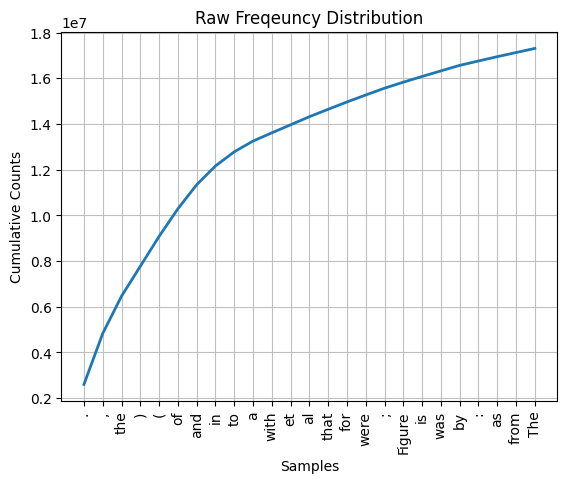

In [14]:
fdist1.plot(25, title = 'Raw Freqeuncy Distribution', cumulative = True);

In [15]:
fdist1.hapaxes()[:10]
#first ten unique words

['geo-coded',
 'June/July',
 'December/January',
 'Medina-Ramón',
 'Bobb',
 'winter-summer',
 'MacDorman',
 'Lerchl',
 'always-connected',
 '15-24']

In [16]:
elife_doc_lengths = []

for doc in articles_list:
    elife_doc_lengths.append(len(doc))

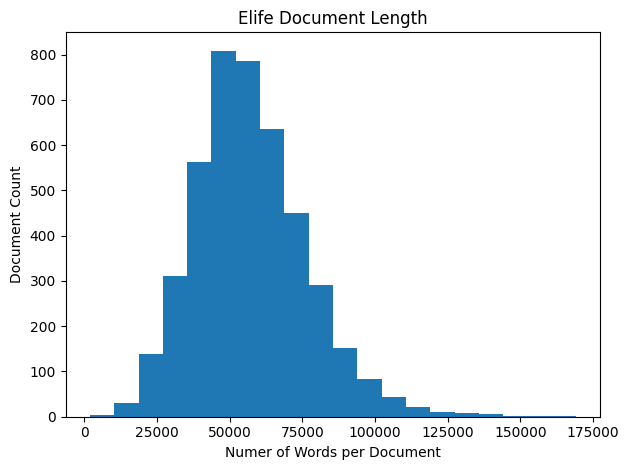

In [ ]:
n_bins = 20
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
axs.hist(elife_doc_lengths, bins=n_bins)
axs.set_title("Elife Document Length");
axs.set_xlabel('Number of Words per Document');
axs.set_ylabel("Document Count");

In [22]:
#run data through data cleaning function

clean_corpus = []
for doc in articles_list:
    clean_corpus.append(data_cleaner(doc))
print("done")

done


In [23]:
df_elife_train['clean'] = clean_corpus

df_elife_train.head()

,article,summary,section_headings,keywords,year,title,clean
0,"In temperate climates , winter deaths exceed s...","In the USA , more deaths happen in the winter ...","[Abstract, Introduction, Results, Discussion, ...","[epidemiology, and, global, health]",2018,National and regional seasonal dynamics of all...,temperate climate winter death exceed summer o...
1,Whether complement dysregulation directly cont...,Most people have likely experienced the discom...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology, and, infectious, disease, immun...",2019,Complement and CD4+ T cells drive context-spec...,whether complement dysregulation directly cont...
2,Variation in the presentation of hereditary im...,The immune system protects an individual from ...,"[Abstract, Introduction, Results, Discussion, ...","[microbiology, and, infectious, disease, immun...",2015,Phenotypic complementation of genetic immunode...,variation presentation hereditary immunodefici...
3,Rapid and flexible interpretation of conflicti...,The brain adapts to control our behavior in di...,"[Abstract, Introduction, Results, Discussion, ...",[neuroscience],2016,Cascade of neural processing orchestrates cogn...,rapid flexible interpretation conflict sensory...
4,Myosin 5a is a dual-headed molecular motor tha...,Cells use motor proteins that to move organell...,"[Abstract, Introduction, Results, Discussion, ...","[structural, biology, and, molecular, biophysics]",2015,Structural dynamics of myosin 5 during process...,myosin dual head molecular motor transport car...


In [ ]:
def wordcloud_maker(df, stopwords = None):
    """cretes words clouds from cleaned data"""
    all_clean = " ".join(review for review in df.clean)
    wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(all_clean)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
wordcloud_maker(df_elife_train)

In [ ]:
#These results are extremely funny. We might want to create a custom stopwords 
#list to remove things like et al, figure, doi, dx, org, elife etc

In [29]:
# TRY TF-IDF
# Get training articles from df_elife_train
elife_train_articles = df_elife_train.article.tolist()
elife_train_tfidf_model = TfidfVectorizer()
elife_train_tfidf_vector = elife_train_tfidf_model.fit_transform(elife_train_articles)
print(type(elife_train_tfidf_vector), elife_train_tfidf_vector.shape) # Print the shape of the matrix created

<class 'scipy.sparse._csr.csr_matrix'> (4346, 384924)


In [31]:
# What are the words in the documents?
words_set = elife_train_tfidf_model.get_feature_names()
print(words_set[:10]) # Print first 10 words
print(words_set[-10:])

c:\Users\avery\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '000', '0000', '00000', '000000', '00000000', '000000000000012hemicloea', '000000000000012ocrisiona', '000000000000037holoplatys', '000000000000050manorina']
['𝜽g', '𝜽i', '𝜽inv', '𝜽j', '𝜽n', '𝜽s', '𝜽thinning', '𝝁θ', '𝝍i', '𝟏𝐑𝐂']


In [32]:
# Create array of the scores
elife_train_tfidf_array = elife_train_tfidf_vector.toarray()
print(elife_train_tfidf_array)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00112479 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00477777 0.00259829 0.         ... 0.         0.         0.        ]
 [0.         0.00112112 0.         ... 0.         0.         0.        ]
 [0.         0.00139553 0.         ... 0.         0.         0.        ]]


In [33]:
# Create dataframe of scores for each document
elife_train_tfidf_df = pd.DataFrame(elife_train_tfidf_array, columns = words_set)
print(elife_train_tfidf_df)

            00       000  0000  00000  000000  00000000  \
0     0.000000  0.000000   0.0    0.0     0.0       0.0   
1     0.000000  0.001125   0.0    0.0     0.0       0.0   
2     0.000000  0.000000   0.0    0.0     0.0       0.0   
3     0.000000  0.005862   0.0    0.0     0.0       0.0   
4     0.000000  0.000000   0.0    0.0     0.0       0.0   
...        ...       ...   ...    ...     ...       ...   
4341  0.003695  0.000000   0.0    0.0     0.0       0.0   
4342  0.000000  0.000000   0.0    0.0     0.0       0.0   
4343  0.004778  0.002598   0.0    0.0     0.0       0.0   
4344  0.000000  0.001121   0.0    0.0     0.0       0.0   
4345  0.000000  0.001396   0.0    0.0     0.0       0.0   

      000000000000012hemicloea  000000000000012ocrisiona  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          0.0                       0.0   
3                          0.0                     

In [53]:
print(elife_train_tfidf_df.at[0, '00']) # Print first cell in dataframe

0.0


In [48]:
# Test regex for letters and numbers only
pattern = r"^[A-Za-z0-9_-]*$"
text = ","
print(bool(re.fullmatch(pattern, text)))

text2 = "0f"
print(bool(re.fullmatch(pattern, text2)))

False
True


In [ ]:
# THIS DOESN"T RUN YET BECAUSE TFIDF DOESNT INCLUDE PUNC AND SPLITS HYPHENATED WORDS

elife_train_doc1 = article_tokens[0] # Get first document in token form
doc_index = 0 # The index of the document

sent_ind = 0 # Saves current sentence number
curr_sent = "" # Saves current sentence that is building
sentences = [] # Saves list of all sentences
curr_imp = 0 # Saves current sentence importance
sent_imp_dict = {} # Dict of sent_ind -> importance score

for token in elife_train_doc1: # For every token in the document
    curr_sent += token # Add token to curr sent string
    curr_imp += elife_train_tfidf_df.at[doc_index, token.lower()] # Get importance of current token from the tfidf df

    if token == ".": # If the token is a period
        sentences.append(curr_sent) # Save this sentence to the list of all sentences
        curr_sent = "" # Reset curr
        sent_imp_dict[sent_ind] = curr_imp # Save current importance to dictionary with current sent index as key
        curr_imp = 0 # Reset curr
        sent_ind += 1 #Update index

tot_sent_num = len(sentences) # Get total number of sentences in this doc
print(tot_sent_num)

print(sentences) # Print sentence list

KeyError: 'a'

In [35]:
#Rachel's TFIDF implementation
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range=(1,2))
#calculate the TF-IDF score for unigrams and bigrams in text
elife_train_clean = df_elife_train.clean.tolist()
elife_t_c = vectorizer.fit_transform(elife_train_clean)
elife_t_c  = pd.DataFrame.sparse.from_spmatrix(elife_t_c)
elife_t_c.columns = sorted(vectorizer.vocabulary_)
elife_t_c.set_index(df_elife_train.index, inplace=True)

In [36]:
#sparse data matrix, doc id num on y axis, type on x axis, vector as data
elife_t_c


,aa,aa aa,aa aaagagaaactgccaacgc,aa aacgacgaagtcgtgcctgttctccatatggatggcagcaatgatcggatccccgggttaattaaprp,aa aappp,aa aapppx,aa aav,aa ab,aa able,aa abolish,...,zzz knock,zzz knockdown,zzz principal,zzz prognostic,zzz shrna,zzz study,zzz sw,zzz two,zzzpat,zzzpat software
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#checking for data
vocab = list(vectorizer.vocabulary_.items())
print(vocab[:5])

[('temperate', 6075929), ('climate', 1019411), ('winter', 6664718), ('death', 1465920), ('exceed', 2103013)]


In [40]:
#typ check
print(type(elife_t_c))

<class 'pandas.core.frame.DataFrame'>


In [42]:
#get doc/row 4345
row = elife_t_c.iloc[4345]

In [43]:
#max value = highest vector = "best feature"
max_value = row.max()

In [44]:
print(max_value)

0.6702679286160886


In [45]:
#"most important word?"
column_of_max = row.idxmax()
print(column_of_max)

radiomic
